In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [2]:
url= 'http://bit.ly/w-data'
data = pd.read_csv(url)
print('data load successfully')

data load successfully


In [3]:
data.head(10)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape


(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The correlation value between hours studied and score is 0.9761906560220888


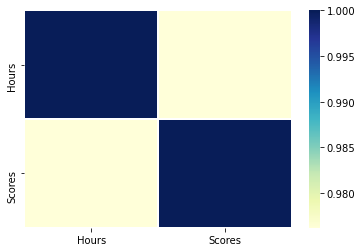

In [7]:
data_corr = data.corr()
print('The correlation value between hours studied and score is {}'.format(data_corr.iloc[0,1]))
ax= sns.heatmap(data_corr, cmap='YlGnBu', linewidths=0.5)

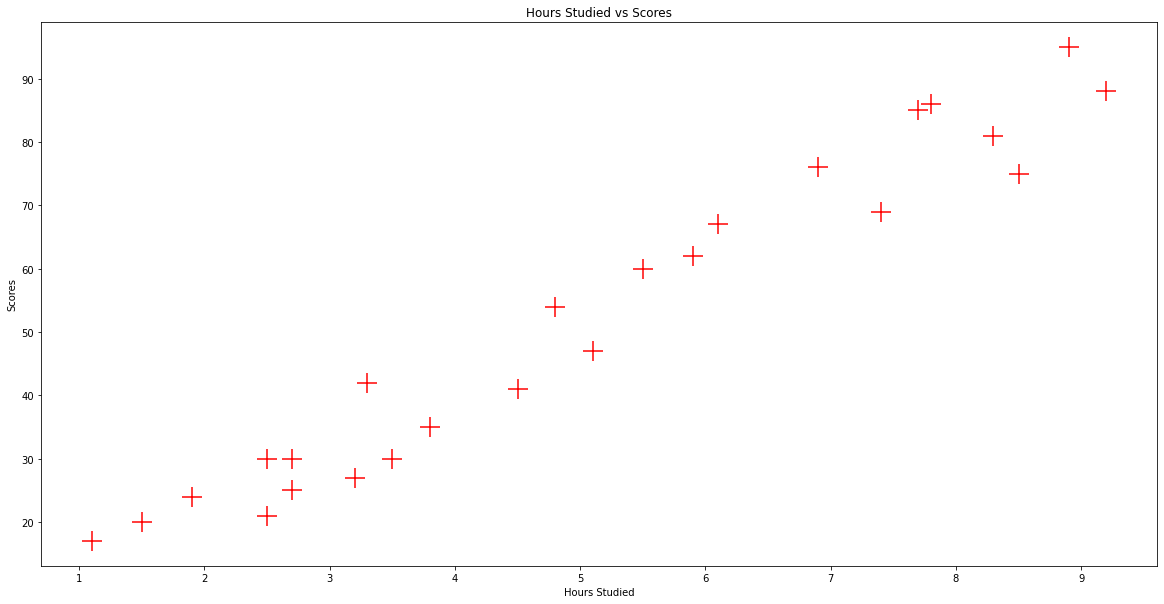

In [8]:
#Data Visualisation
plt.figure(figsize=(20,10))
plt.scatter(data['Hours'],data['Scores'],marker='+', color='r',cmap='YlGnBu', s=400)
plt.title('Hours Studied vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

In [9]:
X= data.iloc[:, 0].values
Y= data.iloc[:, 1].values

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.2, random_state=0)

In [15]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
[20 27 69 30 62]


In [16]:
model= LinearRegression()
model.fit(X_train.reshape(-1,1),y_train)
print('training complete!')

training complete!


In [13]:
!pip install pandas

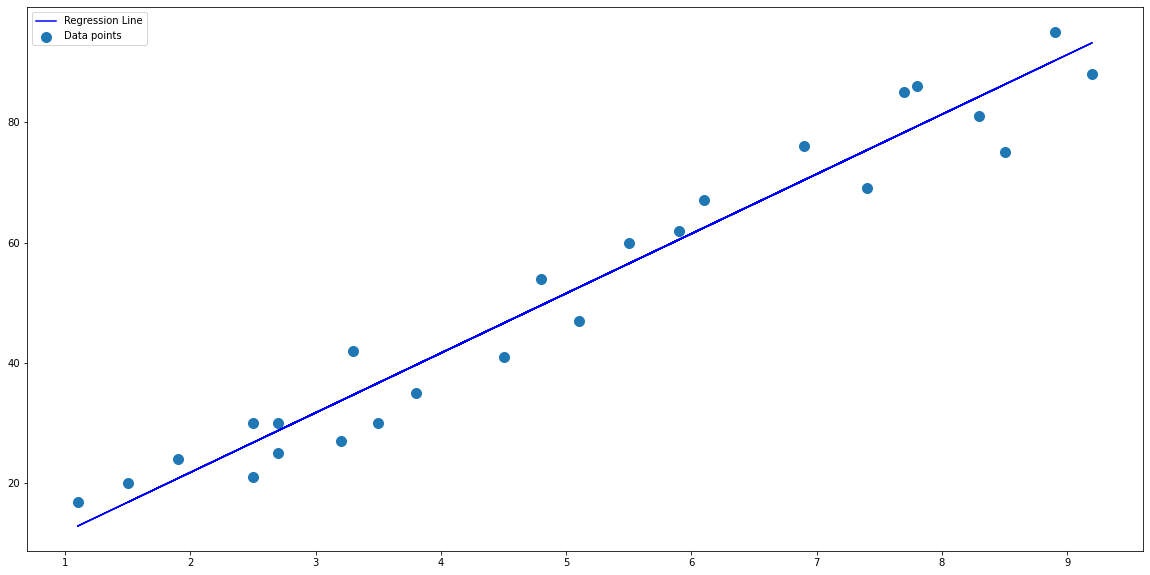

In [20]:
#Plotting the Regression line
line= model.coef_ *X + model.intercept_
plt.figure(figsize = (20,10))
plt.scatter(X,Y,s=100,label= 'Data points')
plt.plot(X, line, color='b',label='Regression Line')
plt.legend()
plt.show()

In [21]:
#print the test data using linear Regression model
print(X_test)
y_pred = model.predict(X_test.reshape(-1,1))

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [23]:
#Comparing actual data with the predicted data
dataf= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataf.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [24]:
#Estemating training and test score
print('Training Score: ',model.score(X_train.reshape(-1,1),y_train))
print('Test Score: ', model.score(X_test.reshape(-1,1),y_test))

Training Score:  0.9515510725211552
Test Score:  0.9454906892105356


In [25]:
print('Training Score: {} '.format(model.score(X_train.reshape(-1,1),y_train)))
print('Test Score: {}' .format(model.score(X_test.reshape(-1,1),y_test)))

Training Score: 0.9515510725211552 
Test Score: 0.9454906892105356


In [26]:
#Predicting the marks of student if he study for 9.25 hours.
hour= 9.25
test=np.array([hour])
test= test.reshape(-1,1)
pred_score= model.predict(test)
print('No of hours is : {}'.format(hour))
print('No of scores is : {}'.format(pred_score[0]))

No of hours is : 9.25
No of scores is : 93.69173248737538
